# **Lab 3b. Support Vector Machine Classifier**
## **Data preparation**
To run the lab exercises for the different machine learning methods, we are going to create a synthetic dataset comprising forest and non-forest classes. We will normalize the dataset (range [0, 1]) and split into training and testing set.

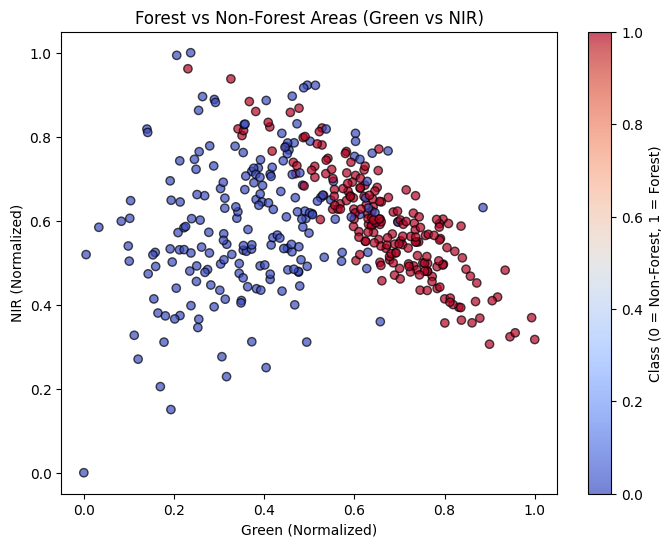

      Green       Red       NIR  Class
0  0.528320  0.469761  0.780341      1
1  0.254992  0.561103  0.365518      0
2  0.191501  0.730518  0.695006      0
3  0.678188  0.949385  0.506753      1
4  0.831578  0.634287  0.394177      1


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
X, y = make_classification(n_samples=400, n_features=3, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, random_state=42)

# Convert into a DataFrame
data = pd.DataFrame(X, columns=['Green', 'Red', 'NIR'])
data['Class'] = y

# Normalize the features (Green, Red, NIR)
scaler = MinMaxScaler()
data[['Green', 'Red', 'NIR']] = scaler.fit_transform(data[['Green', 'Red', 'NIR']])

# Split into training and test sets
X = data[['Green', 'Red', 'NIR']].values
y = data['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the dataset in 2D (Green vs NIR)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 2], c=y, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel('Green (Normalized)')
plt.ylabel('NIR (Normalized)')
plt.title('Forest vs Non-Forest Areas (Green vs NIR)')
plt.colorbar(label='Class (0 = Non-Forest, 1 = Forest)')
plt.show()

# Display the first few rows of the DataFrame
print(data.head())

## **Function for decision boundaries**
Next, we are going to define a function to plot the decision boundary.

In [ ]:
# Define function
def plot_decision_boundary(model, X, y, title):
    """
    Plots the decision boundary for a 2D dataset.
    """
    # Remove plt.figure(...) and plt.show() calls here
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot into the *current* axes
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel("Green")
    plt.ylabel("NIR")
    plt.title(title)
    plt.colorbar(label='Class (0 = Non-Forest, 1 = Forest)')

# **SVM (Linear kernel)**
## **Procedure**
First, We will initialize and train a SVM linear kernel classifier.

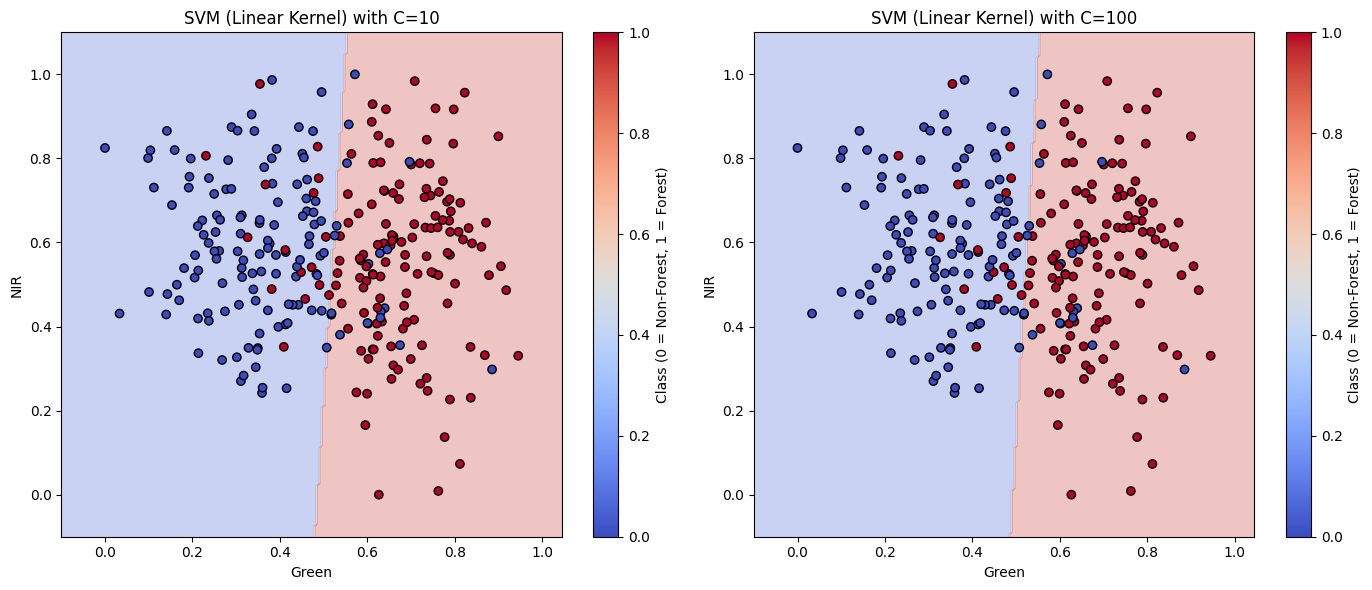

In [ ]:
# Import the support vector machine (SVM) classifier
from sklearn.svm import SVC

# Initialize the Support Vector Machine (SVM) classifier with linear kernel
svm_linear_1 = SVC(kernel='linear', C=10, random_state=42)  # Regularization parameter C=10
svm_linear_2 = SVC(kernel='linear', C=100, random_state=42)  # Regularization parameter C=100

# Train the SVM models using the first two features
svm_linear_1.fit(X_train[:, :2], y_train)
svm_linear_2.fit(X_train[:, :2], y_train)

# Plot both decision boundaries
plt.figure(figsize=(14, 6))

# Plot decision boundary for C=10
plt.subplot(1, 2, 1)
plot_decision_boundary(svm_linear_1, X_train[:, :2], y_train, "SVM (Linear Kernel) with C=10")

# Plot decision boundary for C=100
plt.subplot(1, 2, 2)
plot_decision_boundary(svm_linear_2, X_train[:, :2], y_train, "SVM (Linear Kernel) with C=100")

# Finalize the layout and display the plot
plt.tight_layout()
plt.show()

# **SVM (Polynomial kernel)**
- **Polynomial kernel**  
Maps the input space to a higher-degree polynomial feature space.
Useful when the relationship between features is non-linear.

Formula:
$$ K(x, y) = (x^T y + c)^d $$

where d is the degree of the polynomial and c is a free parameter.

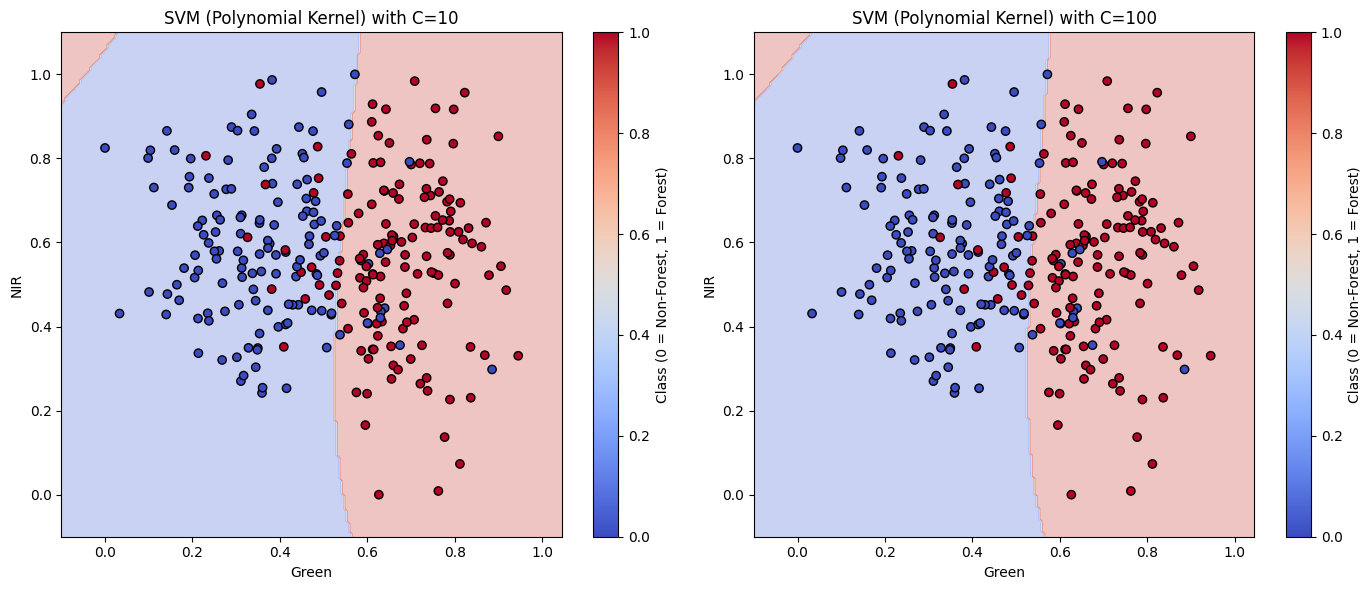

In [ ]:
# Initialize the SVM classifier with a polynomial kernel
svm_poly_1 = SVC(kernel='poly', degree=3, C=10, random_state=42)  # Polynomial degree 3, C=10
svm_poly_2 = SVC(kernel='poly', degree=3, C=100, random_state=42)  # Polynomial degree 3, C=100

# Train the SVM models using the first two features
svm_poly_1.fit(X_train[:, :2], y_train)
svm_poly_2.fit(X_train[:, :2], y_train)

# Plot both decision boundaries
plt.figure(figsize=(14, 6))

# Plot decision boundary for C=10
plt.subplot(1, 2, 1)
plot_decision_boundary(svm_poly_1, X_train[:, :2], y_train, "SVM (Polynomial Kernel) with C=10")

# Plot decision boundary for C=100
plt.subplot(1, 2, 2)
plot_decision_boundary(svm_poly_2, X_train[:, :2], y_train, "SVM (Polynomial Kernel) with C=100")

# Finalize the layout and display the plot
plt.tight_layout()
plt.show()

# **SVM (RBF kernel)**
- **Radial basis function (RBF) kernel:**  

$$
K(x_i, x_j) = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)
$$  
The RBF kernel computes similarity between two points using a Gaussian function.


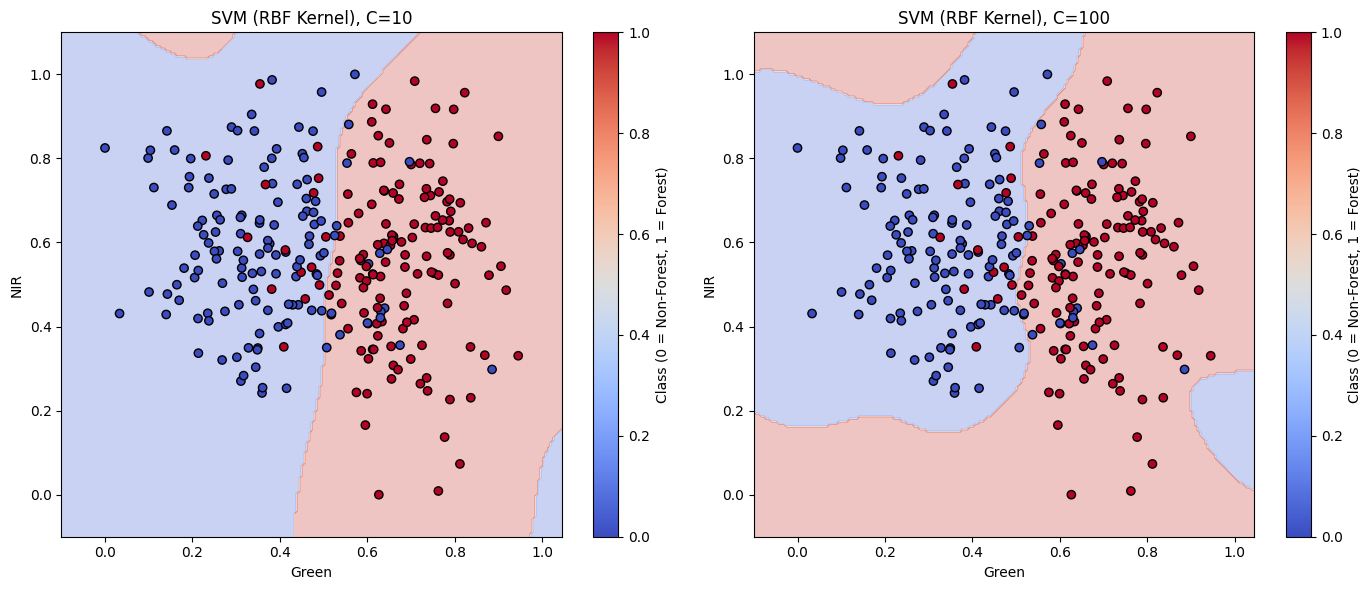

In [ ]:
# Create two SVM classifiers with the RBF kernel and different C values
svm_rbf_c1 = SVC(kernel='rbf', C=10, random_state=42)
svm_rbf_c10 = SVC(kernel='rbf', C=100, random_state=42)

# Train both models on the first two features
svm_rbf_c1.fit(X_train[:, :2], y_train)
svm_rbf_c10.fit(X_train[:, :2], y_train)

# Plot both decision boundaries side by side
plt.figure(figsize=(14, 6))

# First subplot for C=10
plt.subplot(1, 2, 1)
plot_decision_boundary(svm_rbf_c1, X_train[:, :2], y_train, "SVM (RBF Kernel), C=10")

# Second subplot for C=100
plt.subplot(1, 2, 2)
plot_decision_boundary(svm_rbf_c10, X_train[:, :2], y_train, "SVM (RBF Kernel), C=100")

plt.tight_layout()
plt.show()

# **SVM (Sigmoid Kernel)**
- **Sigmoid Kernel**  
Similar to the activation function of a neural network.

$$ K(x, y) = \tanh(\alpha x^T y + c) $$

where α and c are kernel parameters.

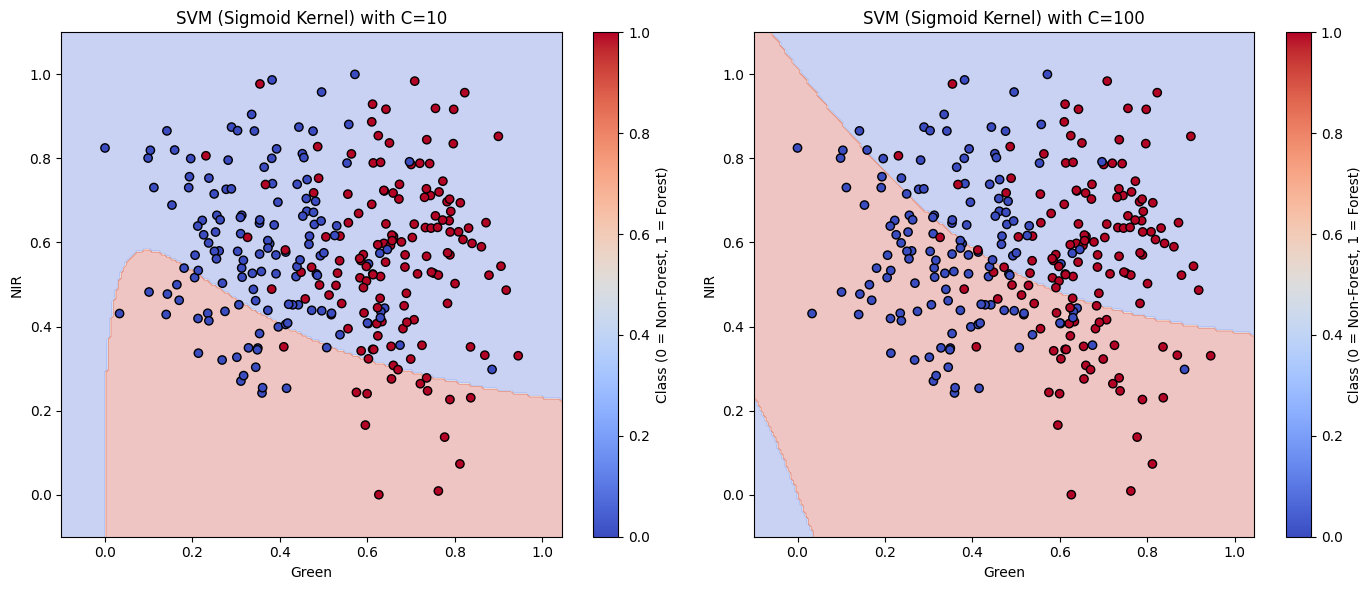

In [ ]:
# Initialize the SVM classifier with a Sigmoid kernel
svm_sigmoid_1 = SVC(kernel='sigmoid', C=10, gamma='scale', random_state=42)  # C=10
svm_sigmoid_2 = SVC(kernel='sigmoid', C=100, gamma='scale', random_state=42)  # C=100

# Train the SVM models using the first two features
svm_sigmoid_1.fit(X_train[:, :2], y_train)
svm_sigmoid_2.fit(X_train[:, :2], y_train)

# Plot both decision boundaries
plt.figure(figsize=(14, 6))

# Plot decision boundary for C=10
plt.subplot(1, 2, 1)
plot_decision_boundary(svm_sigmoid_1, X_train[:, :2], y_train, "SVM (Sigmoid Kernel) with C=10")

# Plot decision boundary for C=100
plt.subplot(1, 2, 2)
plot_decision_boundary(svm_sigmoid_2, X_train[:, :2], y_train, "SVM (Sigmoid Kernel) with C=100")

# Finalize the layout and display the plot
plt.tight_layout()
plt.show()